# Data read in

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import SGD

In [30]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
y_train[0]

5

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [55]:
x_train.shape

(60000, 28, 28, 1)

In [57]:
# x_train[0]

In [34]:
# y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
# y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

# Model train

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=5, strides=1, padding='valid', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, strides=1, padding='valid'),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Reshape((320,)),
    tf.keras.layers.Dense(units=50, input_shape=(320,)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, input_shape=(50,)),
    tf.keras.layers.Activation('softmax')
])

In [43]:
learning_rate = 0.01
momentum = 0.9
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

In [44]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [48]:
batch_size = 64
num_classes = 10
epochs = 10

In [49]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [50]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9386 - loss: 0.2101 - val_accuracy: 0.9850 - val_loss: 0.0502
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9455 - loss: 0.1826 - val_accuracy: 0.9852 - val_loss: 0.0486
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9494 - loss: 0.1665 - val_accuracy: 0.9873 - val_loss: 0.0419
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9506 - loss: 0.1672 - val_accuracy: 0.9827 - val_loss: 0.0518
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9532 - loss: 0.1575 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9546 - loss: 0.1532 - val_accuracy: 0.9865 - val_loss: 0.0392
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9560 - loss: 0.1484 - val_accuracy: 0.9877 - val_loss: 0.0409
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9562 - loss: 0.1469 - 

# Prediction

Label: 6


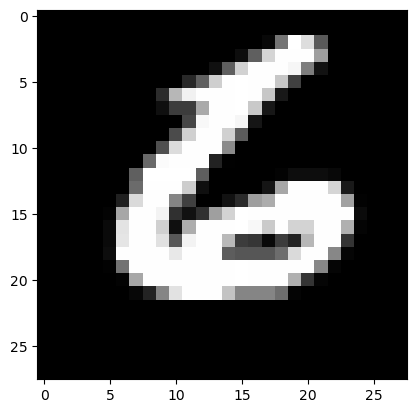

In [60]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
example_datas, label = x_test[-1], y_test[-1]
sample = example_datas
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(label))

In [61]:
sample.shape

(28, 28, 1)

In [69]:
prediction = model.predict(sample.reshape(1, *sample.shape))
print(tf.math.argmax(prediction[0]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
tf.Tensor(6, shape=(), dtype=int64)
[[1.38723721e-07 4.06636003e-10 3.57227350e-08 1.04777976e-13
  2.94144826e-07 9.87090076e-10 9.99999523e-01 1.36553961e-15
  1.21115367e-08 2.06931030e-13]]


In [81]:
model.export("models/mnist_tf/1")

INFO:tensorflow:Assets written to: models/mnist_tf/1/assets


INFO:tensorflow:Assets written to: models/mnist_tf/1/assets


Saved artifact at 'models/mnist_tf/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_55')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139700154830480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154831440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154831248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154832208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154831632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154832976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154832400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139700154833744: TensorSpec(shape=(), dtype=tf.resource, name=None)


# idempotent register (register + upload)

In [1]:
from minio import Minio
from model_registry import ModelRegistry
from typing import Any
import os

/opt/conda/lib/python3.11/site-packages/model_registry/types/artifacts.py:275: UserWarning: Field name "schema" in "DataSet" shadows an attribute in parent "Artifact"
  class DataSet(Artifact):


In [7]:
STORAGE_URL = "storage.googleapis.com"
ACCESS_KEY = "GOOG1EPS3GDMSCYVXLM7MWGC33MCUDSTKU7VONUEMPUVQXB432PKRG3WWFGD2"
SECRET_KEY = ""

MODEL_REGISTRY_URL = "http://model-registry-service.kubeflow-user-example-com.svc.cluster.local"
MODEL_REGISTRY_PORT = 8080

BUCKET = "kubeflow-first-hand-experience"

In [8]:
minio_client = Minio(STORAGE_URL,
    access_key=ACCESS_KEY,
    secret_key=SECRET_KEY,
    secure=True  # only when you use http
)

In [9]:
registry = ModelRegistry(
    server_address=MODEL_REGISTRY_URL,
    port=MODEL_REGISTRY_PORT,
    author="joel",
    is_secure=False  # Set to True if your Model Registry uses HTTPS
)

In [17]:
def upload_directory_recursive(client, local_path, bucket_name, minio_prefix=""):
    for item in os.listdir(local_path):
        full_local_path = os.path.join(local_path, item)
        full_minio_path = os.path.join(minio_prefix, item).replace(os.sep, "/") # Ensure forward slashes for MinIO

        if os.path.isfile(full_local_path):
            client.fput_object(bucket_name, full_minio_path, full_local_path)
        elif os.path.isdir(full_local_path):
            upload_directory_recursive(client, full_local_path, bucket_name, full_minio_path)

In [18]:
def register(registry, name, path, version, **kwargs) -> Any:
    registry.register_model(name, path, model_format_name=kwargs.get('model_format_name', 'tensorflow'), model_format_version=kwargs.get('model_format_version', '1'), version=version, description=kwargs.get('description', None), metadata=kwargs.get('metadata'))
    return registry

In [19]:
model_version = '1'
model_name = 'mnist_tf'

In [20]:
upload_directory_recursive(minio_client, 'models', BUCKET)

In [21]:
reg = register(registry, model_name, f'{STORAGE_URL}/{BUCKET}/mnist_tf', model_version)

In [22]:
art = reg.get_model_artifact(model_name, model_version)
print("Registered Artifact:", art, "with ID", art.id)

Registered Artifact: name='mnist_tf' id='3' description=None external_id=None create_time_since_epoch='1764662677932' last_update_time_since_epoch='1764662677932' custom_properties=None state=<ArtifactState.UNKNOWN: 'UNKNOWN'> experiment_id=None experiment_run_id=None model_format_name='tensorflow' model_format_version='1' storage_key=None storage_path=None service_account_name=None model_source_kind=None model_source_class=None model_source_group=None model_source_id=None model_source_name=None uri='storage.googleapis.com/kubeflow-first-hand-experience/mnist_tf' with ID 3
